9.0


/Users/tkimura/Desktop/RNP/venv/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../venv/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/Users/tkimura/Desktop/RNP/venv/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


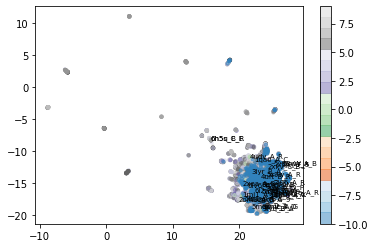

In [8]:
posi_path = '/Users/tkimura/Desktop/RNP/check_contact/non_redun_positives.txt'
# posi_path = '/Users/tkimura/Desktop/RNP/check_contact/filtered_xray_positives.txt'
posi_path_selected = '/Users/tkimura/Desktop/RNP/check_contact/selected_positives.txt'

neg_path = '/Users/tkimura/Desktop/RNP/zdock/vectors.csv'
path = '/Users/tkimura/Desktop/RNP/check_contact/nega_posi_all_vectors.txt'
# path = '/Users/tkimura/Desktop/RNP/check_contact/filtered_xray_positives.txt'
# figpath =  '/Users/tkimura/Desktop/RNP/check_contact/UMAP/positives_filtered_xray.png'
figpath =  '/Users/tkimura/Desktop/RNP/check_contact/UMAP/all.png'
from scipy.sparse.csgraph import connected_components
import umap, numpy as np
from sklearn.datasets import load_digits
from scipy.sparse.csgraph import connected_components
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE

uscls = tuple(range(2, 82))
# print(uscls)

# filter positive vectors
with open(posi_path_selected, 'w') as fo:
    with open(posi_path) as f1:
        for lines in f1.readlines():
            if 'vec_id' in lines:
                fo.writelines(lines)
            else:
                element = lines.split(',')
                if int(element[82]) < 10:
                    fo.writelines(lines)

# merge neg and posi vector files
with open(path, 'w') as fo:
    with open(posi_path_selected) as f1:
        for lines in f1.readlines():
            fo.writelines(lines)
    with open(neg_path) as f2:
        for lines in f2.readlines():
            if 'vec_id' in lines:
                continue
            else:
                fo.writelines(lines)

vec_data = np.loadtxt(path, delimiter=',', usecols=uscls, skiprows=1)
reducer = umap.UMAP()
label_data = np.loadtxt(path, delimiter=',', usecols=82, skiprows=1)
pdbid_data = np.loadtxt(path, delimiter=',', usecols=0, skiprows=1, dtype='str')
print(label_data.max())

embedding = reducer.fit_transform(vec_data)
fig = plt.figure()
plt.scatter(embedding[:, 0], embedding[:, 1], c=label_data, cmap='tab20c', s=10, alpha=0.5)
plt.colorbar()
for i in range(embedding.shape[0]):
    if label_data[i] == 0:
        # print('zero!!!!')
        # plt.text(embedding[i,0], embedding[i,1], str(label_data[i]).replace('.0', ''), fontsize=7)
        plt.text(embedding[i,0], embedding[i,1], str(pdbid_data[i]).replace('.0', ''), fontsize=7)
fig.savefig(figpath, dpi=600)